In [75]:
library(tidyverse)
dur_word_freq <- read_csv("https://raw.githubusercontent.com/LingData2019/LingData2020/master/data/dur_word_frequency.csv")

New names:
• `` -> `...1`
Rows: 832 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Lemma, Participant, Cond, Exponent
dbl (4): ...1, LogDurationA, LogDurationW, Frequency

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [76]:
library(dplyr)

In [77]:
glimpse(dur_word_freq)

Rows: 832
Columns: 8
$ ...1         <dbl> 11431, 1, 136, 71, 11581, 33, 100, 16957, 127, 163, 218, …
$ LogDurationA <dbl> -1.324496, -1.357757, -1.496422, -1.284340, -1.331510, -1…
$ LogDurationW <dbl> -0.4768593, -0.3595504, -0.2701372, -0.3773472, -0.447127…
$ Lemma        <chr> "schab", "blas", "schlaf", "lahm", "lahm", "fahnd", "mahn…
$ Participant  <chr> "Art_02_S01", "Art_02_S01", "Art_02_S01", "Art_02_S01", "…
$ Cond         <chr> "slow", "slow", "slow", "slow", "slow", "slow", "slow", "…
$ Exponent     <chr> "t", "n", "en", "en", "t", "en", "en", "t", "n", "n", "n"…
$ Frequency    <dbl> -6.980044, -5.740760, -4.676302, -6.263638, -6.469370, -6…


1.0 t-test
С помощью t-критерия Стьюдента мы хотим определить статистическую значимость различия значений применительно к следующим переменным:

word durarion in fast condition and word duration in slow condition,

segment duration in fast condition and segment duration in slow condition.

Что мы хотим проверить, используя t-критерия Стьюдента?
1) что если мы возьмем любую другую выборку, то в ней средние по этим переменным будут различаться 2) что различие этих длительностей имеет место не только на выборках, но и в генеральной совокупности 3) мы хотим подтвердить, что наша нулевая гипотеза верна

In [ ]:
# 1) Наоборот; наша нулевая гипотеза состоит в том, что и на любой другой выборке средние не будут отличаться.
# 2) Верно.
# 3) Мы не можем "подтвердить", что гипотеза верна. Мы можем либо отвергнуть гипотезу, либо не отвергнуть (=оставить).

1.1a Гипотезы
В первую очередь, сформулируйте нулевую гипотезу (H_0) и альтернативную гипотезу (H_1). Если для выполнения задания нужно сформулировать несколько H_0 и H_1, сделайте это, продублировав этот и следующий разделы (1.1а, 1.2a, 1.3.a, 1.1b, 1.2b и т.д.)

In [ ]:
# Нулевая гипотеза: длительность произнесения слова не отличается в условиях fast и slow (m_fast = m_slow)
# Альтернативная гипотеза: длительность произнесения слова отличается в зависимости от условий (m_fast ≠ m_slow)
# Пусть альфа стандартно 0.95.

1.1b

In [ ]:
# Нулевая гипотеза: длительность произнесения сегмента не отличается в условиях fast и slow (m_fast = m_slow)
# Альтернативная гипотеза: длительность произнесения сегмента отличается в зависимости от условий (m_fast ≠ m_slow)
# Гипотезы идентичны для длительности слова и сегмента. Таким образом, у нас четыре гипотезы.

1.2a Тест
Загрузите данные и примените t.test для проверки гипотез.

In [78]:
# t-test для логарифма длины слова в условиях fast и slow
t_test_word <- t.test(LogDurationW ~ Cond, data = dur_word_freq)
t_test_word


	Welch Two Sample t-test

data:  LogDurationW by Cond
t = -11.562, df = 829.89, p-value < 2.2e-16
alternative hypothesis: true difference in means between group fast and group slow is not equal to 0
95 percent confidence interval:
 -0.1582922 -0.1123477
sample estimates:
mean in group fast mean in group slow 
        -0.5836253         -0.4483053 


In [ ]:
# Или вот так

In [80]:
# Создаём векторы
fast_w <- dur_word_freq %>% filter(Cond == "fast") %>% pull(LogDurationW)
slow_w <- dur_word_freq %>% filter(Cond == "slow") %>% pull(LogDurationW)

In [83]:
t_test_word2 <- t.test(fast_w, slow_w, paired = FALSE)
t_test_word2


	Welch Two Sample t-test

data:  fast_log_duration_w and slow_log_duration_w
t = -11.562, df = 829.89, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1582922 -0.1123477
sample estimates:
 mean of x  mean of y 
-0.5836253 -0.4483053 


1.2b

In [79]:
# t-test для логарифма длины сегмента
t_test_segment <- t.test(LogDurationA ~ Cond, data = dur_word_freq)
t_test_segment


	Welch Two Sample t-test

data:  LogDurationA by Cond
t = -7.5116, df = 822.67, p-value = 1.523e-13
alternative hypothesis: true difference in means between group fast and group slow is not equal to 0
95 percent confidence interval:
 -0.13788190 -0.08075098
sample estimates:
mean in group fast mean in group slow 
         -1.738072          -1.628756 


In [ ]:
# Или так

In [84]:
fast_a <- dur_word_freq %>% filter(Cond == "fast") %>% pull(LogDurationA)
slow_a <- dur_word_freq %>% filter(Cond == "slow") %>% pull(LogDurationA)

In [86]:
t_test_segment2 <- t.test(fast_a, slow_a, paired = FALSE)
t_test_segment2


	Welch Two Sample t-test

data:  fast_a and slow_a
t = -7.5116, df = 822.67, p-value = 1.523e-13
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.13788190 -0.08075098
sample estimates:
mean of x mean of y 
-1.738072 -1.628756 


1.3a Интерпретация
Интерпретируйте результаты t-теста. Включите в вывод t-статистику, степени свободы и p-values. Можно ли заключить, что имеется различие в длительности слов в быстрых и медленных условиях в генеральной совокупности? Можно ли заключить то же самое в отношении длительности сегментов?

In [ ]:
# Длительность произнесения слова
# t отрицательное => средняя длительность произнесения слова меньше для fast, чем для slow (логично)
# p-value очень маленькое => разница статистически значима
# Мы отвергаем нулевую гипотезу в пользу альтернативной => длина произнесения, действительно, зависит от условия эксперимента.

1.3b

In [ ]:
# Длительность произнесения сегмента
# Здесь тоже t-статистика отрицательная => средняя длительность произнесения слова меньше для fast, чем для slow
# Здесь тоже p-value значительно меньше 0.05. Значит, на любой другой выборке мы будем наблюдать тот же результат.
# Тоже отвергаем нулевую гипотезу в пользу альтернативной, длина произнесения зависит от условия. Это различие имеет место и в генеральной совокупности. Выводы аналогичны выводам по LogDurationW

2. Дискуссия
Возможно, применение t-test в чистом виде является не лучшей опцией для решения задачи 1.0. Если вам тоже так кажется, приведите аргументы против его использования и предложите другое решение.

In [9]:
# Мы смотрели на средние значения, но мы не знаем, нормально ли распределены данные.
# Мы также не знаем, равны ли дисперсии по fast и slow. Поэтому можно сравнить аналогом двустороннего независимого t-теста - тестом Манна-Уитни.

2.1а Код для решения
Напишите код, который может помочь в аргументации и покажет другое решение.

In [ ]:
# Для длительности произнесения слова
wilcox.test(LogDurationW ~ Cond, data = dur_word_freq)
wilcox.test


	Wilcoxon rank sum test with continuity correction

data:  LogDurationW by Cond
W = 47712, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


function (x, ...) 
UseMethod("wilcox.test")
<bytecode: 0x58e87bbd3990>
<environment: namespace:stats>

2.1b

In [ ]:
# Для длительности произнесения сегмента
wilcox.test(LogDurationA ~ Cond, data = dur_word_freq)
wilcox.test


	Wilcoxon rank sum test with continuity correction

data:  LogDurationA by Cond
W = 61373, p-value = 5.292e-13
alternative hypothesis: true location shift is not equal to 0


function (x, ...) 
UseMethod("wilcox.test")
<bytecode: 0x58e87bbd3990>
<environment: namespace:stats>

In [ ]:
# Тест показал, что p-value < 0.05 и статистически значимо, значит, мы отвергаем нулевую гипотезу в пользу альтернативной, что длительность произнесения меняется в разных условиях.

3.1 Чтение данных
Запишите данные в переменную Norwegian_data, предварительно удалив строки, в которых возраст усвоения слова не задан (NA). Ваш код должен выдавать количество строк в получившемся датасете.

In [23]:
Norwegian_data <- read_csv("https://raw.githubusercontent.com/olesar/2025dav4compling/refs/heads/main/data/TatmanR_Lexical_acquisition_NO.csv") %>% drop_na(AgeOfAcq)
nrow(Norwegian_data)

Rows: 731 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): WordNo, Translation, WordCategory, BroadCategory
dbl (4): AgeOfAcq, CumulOtherWords, FreqCorpus, ParentFreq

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 695

3.2 Ваша задача - с помощью ggplot визуализировать график возраста освоения слов (Age of Acquisition) по группам BroadCategory, тема - theme_bw. В геоме плотности используйте аргумент сглаживания adjust со значением 2. Подпишите оси и график понятным читателю образом. В комментарии приведен пример использования функции scale_x_continuous в ggplot. С ее помощью подпишите ось X так, чтобы была ясна разбивка по полугоду (то есть 12, 18 месяцев и т. д.).

In [24]:
Norwegian_data <- read_csv("https://raw.githubusercontent.com/olesar/2025dav4compling/refs/heads/main/data/TatmanR_Lexical_acquisition_NO.csv") %>%
  drop_na(AgeOfAcq, BroadCategory)  # Удалила NA в BroadCategory, потому что они там были и рисовались на графике

Rows: 731 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): WordNo, Translation, WordCategory, BroadCategory
dbl (4): AgeOfAcq, CumulOtherWords, FreqCorpus, ParentFreq

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


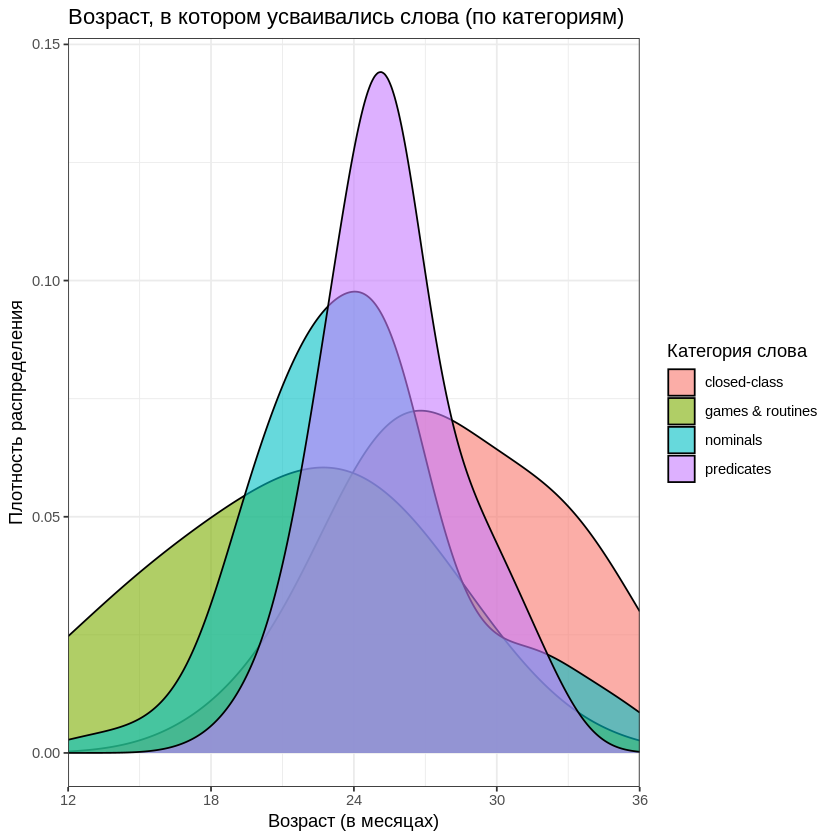

In [25]:
ggplot(Norwegian_data, aes(x = AgeOfAcq, fill = BroadCategory)) +
  geom_density(alpha = 0.6, adjust = 2) +
  scale_x_continuous(expand = c(0, 0),   breaks = seq(0, 36, by = 6)) +
  labs(title = "Возраст, в котором усваивались слова (по категориям)",
       x = "Возраст (в месяцах)",
       y = "Плотность распределения",
       fill = "Категория слова") +
  theme_bw()

3.3 Интерпретация графика плотности

In [ ]:
# Можно сделать вывод, что раньше всего осваиваются слова из категорий nominals и games & routines.
# По всей видимости, дети в первую очередь усваивают слова, связанные с их ежедневными занятиями и играми и слова, прямо называющие объекты.
# В возрасте двух лет ребёнок усваивает больше всего предикатов.
# Позже всего усваиваются слова категории closed_class.

3.4 Возраст освоения VS кумулятивное количество ранее освоенных слов
Постройте график рассеяния по переменным AgeOfAcq и CumulOtherWords, как показано ниже. Здесь использован геом geom_count с разбросом точек (jitter) и прозрачностью 0.5. Палитра - базовая. Предварительно, удалите из данных строки, для которых не указана BroadCategory (NA).



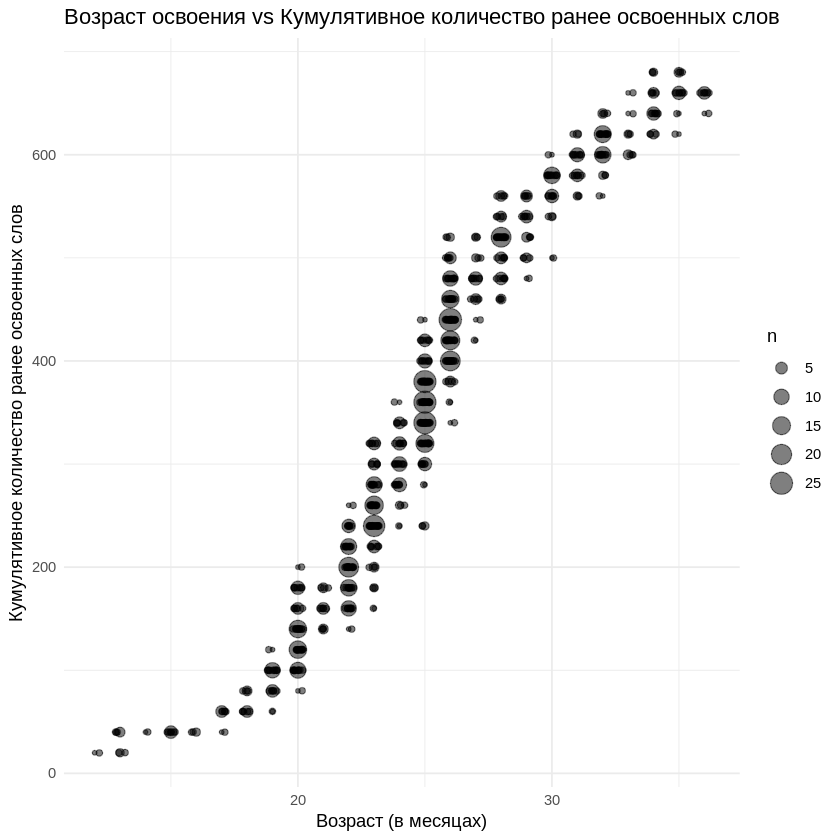

In [26]:
ggplot(Norwegian_data, aes(x = AgeOfAcq, y = CumulOtherWords)) +
  geom_count(alpha = 0.5) +
  geom_jitter(width = 0.2, height = 0.2, alpha = 0.5) +
  labs(title = "Возраст освоения vs Кумулятивное количество ранее освоенных слов",
       x = "Возраст (в месяцах)",
       y = "Кумулятивное количество ранее освоенных слов") +
  theme_minimal()

3.5 Условия для проведения корреляционного анализа
Условием для проведения корреляционного анализа Пирсона является нормальное распределение данных.
Раскомментируйте код ниже, чтобы визуально оценить нормальность распределения переменной AgeOfAcq по графику QQ-plot (quantile-quantile plot). Данные откладываются по оси y, а по оси x откладываются значения, которые бы данные имели, если бы они были идеально нормальными (теоретические квантили). Если данные в выборке нормально распределены, все точки будут лежать на прямой. Полоса вокруг прямой показывает 95% доверительный интервал: если практически все точки попадают в этот интервал, это сильное свидетельство в пользу того, что данные в выборке распределены нормально. Данные распределены ненормально, если они образуют ломаный или сильно изогнутый паттерн, а также если они далеко отходят от прямой в той или иной области.

In [ ]:
install.packages('DescTools')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘rootSolve’, ‘e1071’, ‘lmom’, ‘mvtnorm’, ‘expm’, ‘Exact’, ‘gld’




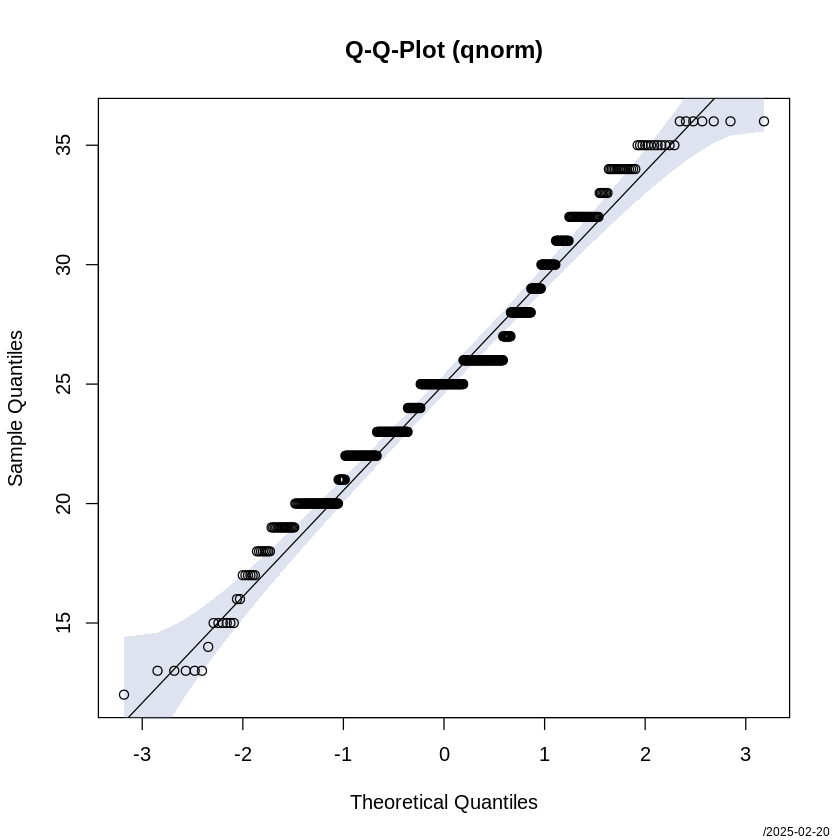

In [ ]:
library(DescTools)
PlotQQ(Norwegian_data$AgeOfAcq)
# В целом точки редко выходят за пределы доверительного интервала, значит, данные распределены нормально.

Постройте QQ-plot для переменной CumulOtherWords.

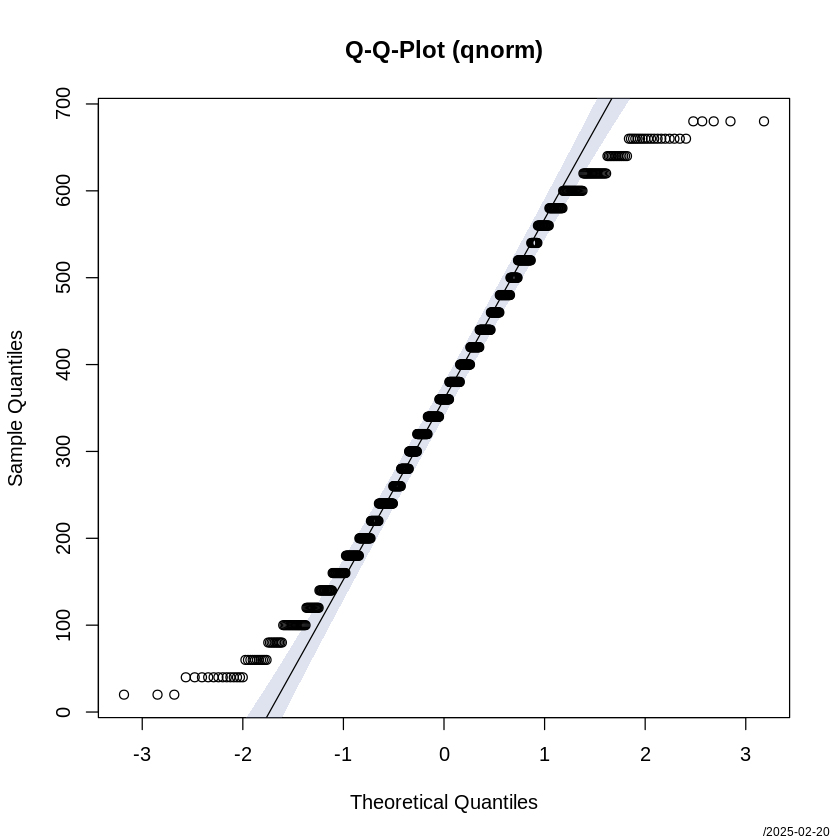

In [ ]:
PlotQQ(Norwegian_data$CumulOtherWords)
# Здесь точки больше выбиваются за пределы доверительного интервала, линия изгибается ближе к 0 и к 700. Возможно, данные распределены здесь не совсем нормально.

3.6 Корреляция AgeOfAcq и CumulOtherWords
С помощью функции cor.test проведите корреляционный анализ. Ваши выводы из предыдущего пункта (3.5) подскажут, какой метод вы должны использовать.

In [ ]:
# Наши данные распределены скорее не нормально, поэтому вместо корреляции Пирсона используем корреляцию Спирмена
cor.test(Norwegian_data$AgeOfAcq, Norwegian_data$CumulOtherWords, method = "spearman")

Warning message in cor.test.default(Norwegian_data$AgeOfAcq, Norwegian_data$CumulOtherWords, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  Norwegian_data$AgeOfAcq and Norwegian_data$CumulOtherWords
S = 785210, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
     rho 
0.985148 


In [ ]:
# Пирсон для сравнения
cor.test(Norwegian_data$AgeOfAcq, Norwegian_data$CumulOtherWords, method = "pearson")


	Pearson's product-moment correlation

data:  Norwegian_data$AgeOfAcq and Norwegian_data$CumulOtherWords
t = 91.664, df = 680, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9557778 0.9670786
sample estimates:
      cor 
0.9618362 


3.7 Интерпретация результатов теста

In [ ]:
# rho (кэффицент корреляции) получился очень близким к единице, что говорит о сильной положительной связи между количеством ранее освоенных слов и возрастом, в котором было усвоено слово.
# Иными словами, чем старше ребёнок, тем больше кумулятивное количество усвоенных ранее слов (логично).
# p-value очень маленькое, значит, между AgeOfAcq и CumulOtherWords есть статистически значимая корреляция.

3.8 Степень свободы
Сравните количество строк в датасете, по которому проводился корреляционный анализ, и степень свободы (df), указанную в результатах теста. Как получилось число df?

In [27]:
Norwegian_data <- read_csv("https://raw.githubusercontent.com/olesar/2025dav4compling/refs/heads/main/data/TatmanR_Lexical_acquisition_NO.csv")

Rows: 731 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): WordNo, Translation, WordCategory, BroadCategory
dbl (4): AgeOfAcq, CumulOtherWords, FreqCorpus, ParentFreq

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [28]:
cor.test(Norwegian_data$AgeOfAcq, Norwegian_data$CumulOtherWords, method = "pearson")


	Pearson's product-moment correlation

data:  Norwegian_data$AgeOfAcq and Norwegian_data$CumulOtherWords
t = 92.832, df = 693, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9561038 0.9672313
sample estimates:
      cor 
0.9620656 


In [ ]:
# Строк в датасете 731. df получилось 693.
# N=df+P, P=2 => 693+2=695. Как видно по коду ниже, именно 695 строчек принимало участие в расчётах.
# Почему только 695? В коде ниже выведены все строки, где есть NA значения. 695+36=731, количество строк нашего датасета.

In [49]:
sum(complete.cases(Norwegian_data$AgeOfAcq, Norwegian_data$CumulOtherWords))

[1] 695

In [54]:
sum(is.na(Norwegian_data$AgeOfAcq) | is.na(Norwegian_data$CumulOtherWords))

[1] 36

In [55]:
695+36

[1] 731